In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
IPL18 = pd.read_excel(r'C:/Users/trent/OneDrive/Documents/Repositories/Pythagorean_Expectations_Predictions/data/IPL2018teams.xlsx')
print(IPL18.columns.tolist())

['scorecard_id', 'start_date', 'phase', 'name', 'home_team', 'away_team', 'toss_winner', 'toss_decision', 'inn1team', 'innings1', 'wickets1', 'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2', 'adjusted_target_indicator', 'adjusted_target', 'team1_overs', 'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status', 'result_type', 'result_margin', 'winning_team']


In [5]:
IPL18

,scorecard_id,start_date,phase,name,home_team,away_team,toss_winner,toss_decision,inn1team,innings1,...,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,2018-04-07,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,Mumbai Indians,165,...,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,2018-04-08,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,Delhi Daredevils,166,...,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,2018-04-08,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,Royal Challengers Bangalore,176,...,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,2018-04-09,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,Rajasthan Royals,125,...,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,2018-04-10,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,Kolkata Knight Riders,202,...,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings
5,1056642,2018-04-11,NaN,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,f,Rajasthan Royals,153,...,y,71,17.5,6,218180,SV Samson,live bbb,wr,10,Rajasthan Royals
6,1056643,2018-04-12,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Mumbai Indians,Sunrisers,f,Mumbai Indians,147,...,n,0,20.0,20,1738090,Rashid Khan,live bbb,ww,1,Sunrisers
7,1056644,2018-04-13,NaN,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,f,Kings XI Punjab,155,...,n,0,20.0,20,356989,UT Yadav,live bbb,ww,4,Royal Challengers Bangalore
8,1056645,2018-04-14,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Delhi Daredevils,Delhi Daredevils,f,Mumbai Indians,194,...,n,0,20.0,20,157435,JJ Roy,live bbb,ww,7,Delhi Daredevils
9,1056646,2018-04-14,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Sunrisers,Sunrisers,f,Kolkata Knight Riders,138,...,n,0,20.0,20,1073273,B Stanlake,live bbb,ww,5,Sunrisers


In [6]:
IPL18['hwin']= np.where(IPL18['home_team']==IPL18['winning_team'],1,0)
IPL18['awin']= np.where(IPL18['away_team']==IPL18['winning_team'],1,0)
IPL18['htruns']= np.where(IPL18['home_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['atruns']= np.where(IPL18['away_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['count']=1

In [7]:
IPLhome = IPL18.groupby('home_team')[['count','hwin', 'htruns','atruns']].sum().reset_index()
IPLhome = IPLhome.rename(columns={'home_team':'team','count':'Ph','htruns':'htrunsh','atruns':'atrunsh'})
IPLhome

,team,Ph,hwin,htrunsh,atrunsh
0,Chennai Super Kings,9,8,1577,1486
1,Delhi Daredevils,7,4,1258,1122
2,Kings XI Punjab,7,4,1188,1202
3,Kolkata Knight Riders,9,5,1468,1417
4,Mumbai Indians,7,3,1194,1171
5,Rajasthan Royals,7,5,1120,994
6,Royal Challengers Bangalore,7,4,1298,1286
7,Sunrisers,7,5,1070,1050


In [8]:
IPLaway = IPL18.groupby('away_team')[['count','awin', 'htruns','atruns']].sum().reset_index()
IPLaway = IPLaway.rename(columns={'away_team':'team','count':'Pa','htruns':'htrunsa','atruns':'atrunsa'})
IPLaway

,team,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,7,3,1264,1232
1,Delhi Daredevils,7,1,1265,1085
2,Kings XI Punjab,7,2,1124,1022
3,Kolkata Knight Riders,7,4,1326,1291
4,Mumbai Indians,7,3,1111,1186
5,Rajasthan Royals,8,2,1362,1237
6,Royal Challengers Bangalore,7,2,1097,1024
7,Sunrisers,10,5,1624,1651


In [9]:
IPL18 = pd.merge(IPLhome, IPLaway, on = ['team'])
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024
7,Sunrisers,7,5,1070,1050,10,5,1624,1651


In [10]:
IPL18['W'] = IPL18['hwin']+IPL18['awin']
IPL18['G'] = IPL18['Ph']+IPL18['Pa']
IPL18['R'] = IPL18['htrunsh']+IPL18['atrunsa']
IPL18['RA'] = IPL18['atrunsh']+IPL18['htrunsa']
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,W,G,R,RA
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,11,16,2809,2750
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,5,14,2343,2387
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,6,14,2210,2326
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,9,16,2759,2743
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,6,14,2380,2282
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237,7,15,2357,2356
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024,6,14,2322,2383
7,Sunrisers,7,5,1070,1050,10,5,1624,1651,10,17,2721,2674


In [11]:
IPL18['wpc'] = IPL18['W']/IPL18['G']
IPL18['pyth'] = IPL18['R']**2/(IPL18['R']**2 + IPL18['RA']**2)
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,W,G,R,RA,wpc,pyth
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,11,16,2809,2750,0.687500,0.510612
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,5,14,2343,2387,0.357143,0.490698
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,6,14,2210,2326,0.428571,0.474444
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,9,16,2759,2743,0.562500,0.502908
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,6,14,2380,2282,0.428571,0.521012
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237,7,15,2357,2356,0.466667,0.500212
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024,6,14,2322,2383,0.428571,0.487037
7,Sunrisers,7,5,1070,1050,10,5,1624,1651,10,17,2721,2674,0.588235,0.508711


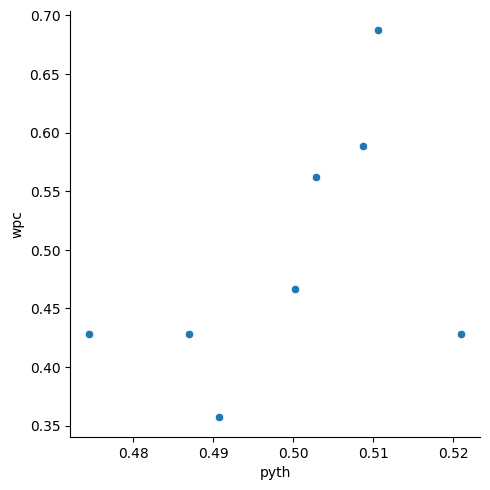

In [12]:
sns.relplot(x="pyth", y="wpc", data =IPL18)

In [13]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=IPL18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.830
Date:                Fri, 25 Jul 2025   Prob (F-statistic):              0.225
Time:                        20:59:09   Log-Likelihood:                 7.9710
No. Observations:                   8   AIC:                            -11.94
Df Residuals:                       6   BIC:                            -11.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2807      1.312     -0.976      0.367      -4.491       1.929
pyth           3.5522      2.626      1.353      0.225      -2.872       9.977
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.217
Skew:                           0.014   Prob(JB):                        0.897
Kurtosis:                       2.193   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""